# Ananta Faadillah Sophan
# Batch HCK-002
# Milestone 2 Phase 2

# Problem Statement
Pada zaman sekarang, penggunaan social media sebagai sarana masyarakat untuk berinteraksi sangat digemari oleh banyak orang. Salah satu social media yang banyak digunakan masyarakat adalah twitter.

Kemudahan seseorang dalam mengutarakan pendapat atau mencurahkan isi pikirannya menyebabkan seringkali terjadinya hasil-hasil tulisan yang terindikasi sebagai Cyberbullying. 

Tingkat pengguna Twitter yang tinggi juga memungkinkan untuk bebas berpendapat kepada siapa saja dan karena di sosial media penggunanya cenderung bersifat anonym, hal ini dapat memicu penggunanya tidak ragu dalam melakukan cyberbullying.

Penting dilakukan pendeteksian konten pada twitter agar kedepannya tidak terlalu banyak lagi tweet yang merupakan cyberbullying

## Objective
Mengklasifikan apakah sebuah tweet pengguna twitter merupakan Cyberbullying atau bukan. Pengklasifikasian Cyberbullying dibagi menjadi 4 tipe yaitu 
Cyberbullying bidang jenis kelamin, umur, ras, dan agama. 

## Dataset
dataset yang digunakan adalah dataset dari kaggle yang berjumlah 46017 tweets dengan 6 klasifikasi jenis tweets

link: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

## Import Library

In [1]:
!pip install nltk
!pip install autocorrect 
!pip install contractions
!pip install emoji


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import string # from some string manipulation tasks
from string import punctuation # solving punctuation problems
import nltk # natural language toolkit
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords # stop words in sentences
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer # For stemming the sentence
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
import re # regex
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings
import emoji
#Libraries for general purpose
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import numpy as np 


import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

np.random.seed(50)
tf.random.set_seed(50)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Loading

Import Dataset yang dibutuhkan dan melakukan sedikit Overview data

In [3]:
df = pd.read_csv('/content/cyberbullying_tweets.csv')

In [4]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [6]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

## Data Cleaning

Dikarenakan Value 'Other_cyberbullying' mempunyai kategori yang bisa ambigu dan juga tidak bisa di grouping terhadap kategori cyberbullying yang lain, maka entry data yang merupakan kategori  other akan di hapus.

In [7]:
df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)


Melihat jumlah data pada setiap target

In [8]:
df['cyberbullying_type'].value_counts()

religion             7998
age                  7992
gender               7973
ethnicity            7961
not_cyberbullying    7945
Name: cyberbullying_type, dtype: int64

Mengubah nama kolom agar lebih mudah dimengerti

In [9]:
df = df.rename(columns={'tweet_text': 'Tweet', 'cyberbullying_type': 'Type'})

Mengkonversi kategori Cyberbullyinh menjadi representasi angka

In [10]:
df['Type'].replace({'not_cyberbullying': 1, 
                      'age': 2, 
                      'gender': 3, 
                      'ethnicity': 4, 
                      'religion': 5}, inplace=True)

## Text Pre-Processing

### Single Documents
- Ubah teks ke lowercase
- Menghilangkan tanda baca
- Menghilangkan karakter yang tidak diperlukan
- Menghilangkan stopwords
- Stemming

Melihat Teks yang dipilih

In [11]:
print(df.Tweet[2])

@XochitlSuckkks a classy whore? Or more red velvet cupcakes?


Mengubah huruf pada teks semuanya menjadi huruf kecil

In [12]:

teks = df.Tweet[2]
teks_lower = teks.lower()
teks_lower

'@xochitlsuckkks a classy whore? or more red velvet cupcakes?'

Menghilangkan tanda baca

In [13]:
teks_punc = teks_lower.translate(str.maketrans("","",string.punctuation))
teks_punc

'xochitlsuckkks a classy whore or more red velvet cupcakes'

Melihat Jenis-Jenis Tanda Baca yang Dihilangkan

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Setelah menghilangkan tanda baca, dilakukan preprocessing secara manual menurut asumsi pribadi bentuk teks atau tanda baca apa saja yang harus dilakukan preprocessing

In [15]:
teks_punc = re.sub("@[A-Za-z0-9_]+"," ", teks_lower) #Menghilangkan mention
teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
teks_punc = re.sub(r"\\n"," ",teks_punc) #Menghilangkan \n
teks_punc = teks_punc.strip() #Menghilangkan whitespace
teks_punc = re.sub(r"http\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub(r"www.\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub("[^A-Za-z\s']"," ", teks_punc) #Menghilangkan yang bukan huruf
teks_punc = re.sub("rt"," ",teks_punc) #Menghilangkan RT
teks_punc = ' '.join(teks_punc.split())
teks_punc

'a classy whore or more red velvet cupcakes'

Menghilangkan StopWords

In [16]:
stpwds = list(set(stopwords.words('english')))

tokens = word_tokenize(teks_punc)
teks_stopwords = ' '.join([word for word in tokens if word not in stpwds])

print('Document     : ', teks_punc)
print('Tokens       : ', tokens)
print('Clean Tokens : ', teks_stopwords)

Document     :  a classy whore or more red velvet cupcakes
Tokens       :  ['a', 'classy', 'whore', 'or', 'more', 'red', 'velvet', 'cupcakes']
Clean Tokens :  classy whore red velvet cupcakes


Melakukan stemming dengan stemmer atau lemmetizer

In [17]:
stemmer = PorterStemmer()
stemmed_content = []

teks_stemm  = stemmer.stem(teks_stopwords)

print('Document       : ', teks_punc)
print('Tokens         : ', tokens)
print('Clean Tokens   : ', teks_stopwords)
print('Stemmed Tokens : ', teks_stemm)




Document       :  a classy whore or more red velvet cupcakes
Tokens         :  ['a', 'classy', 'whore', 'or', 'more', 'red', 'velvet', 'cupcakes']
Clean Tokens   :  classy whore red velvet cupcakes
Stemmed Tokens :  classy whore red velvet cupcak


In [18]:
lemmatizer = WordNetLemmatizer()
stemmed_content = []

teks_lemm  = lemmatizer.lemmatize(teks_stopwords)

print('Document       : ', teks_punc)
print('Tokens         : ', tokens)
print('Clean Tokens   : ', teks_stopwords)
print('Stemmed Tokens : ', teks_lemm)




Document       :  a classy whore or more red velvet cupcakes
Tokens         :  ['a', 'classy', 'whore', 'or', 'more', 'red', 'velvet', 'cupcakes']
Clean Tokens   :  classy whore red velvet cupcakes
Stemmed Tokens :  classy whore red velvet cupcakes


JIka dilihat dari Lemmatizer dan Stemmer, saya memilih Lemmatizer dikarenakan hasil token yang di stem lebih baik

###  All Documents

Membuat Semua Function yang berisi Text Preprocessing untuk diterapkan ke setiap documents yang ada pada dataframe

In [19]:
def teks_proses(teks):
  teks = teks.lower()
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) #Menghilangkan mention
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
  teks = re.sub(r"\\n"," ",teks) #Menghilangkan \n
  teks = teks.strip()
  teks = re.sub(r"http\S+", " ", teks) #Menghilangkan link
  teks = re.sub(r"www.\S+", " ", teks) #Menghilangkan link
  teks = re.sub("[^A-Za-z\s']"," ", teks) #Menghilangkan yang bukan huruf
  teks = re.sub("rt"," ",teks) #Menghilangkan RT
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stpwds])
  teks = lemmatizer.lemmatize(teks)
  teks = re.sub(r"can\'t", "can not", teks)
  teks = re.sub(r"n\'t", " not", teks)
  teks = re.sub(r"\'re", " are", teks)
  teks = re.sub(r"\'s", " is", teks)
  teks = re.sub(r"\'d", " would", teks)
  teks = re.sub(r"\'ll", " will", teks)
  teks = re.sub(r"\'t", " not", teks)
  teks = re.sub(r"\'ve", " have", teks)
  teks = re.sub(r"\'m", " am", teks)
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', teks)
  return teks

Mengaplikasikan fungsi yang telah dibuat kepada semua dataframe, setalah teks sudah dilakukan preprocessing, saya membuat sebuah kolom baru untuk melihat document/teks yang sudah dilakukan preprocessing

In [20]:
df['Tweet_processed'] = df['Tweet'].apply(lambda x: teks_proses(x))
df

,Tweet,Type,Tweet_processed
0,"In other words #katandandre, your food was cra...",1,words food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,1,white
2,@XochitlSuckkks a classy whore? Or more red ve...,1,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",1,meh p thanks heads concerned another angry dud...
4,@RudhoeEnglish This is an ISIS account pretend...,1,isis account pretending kurdish account like i...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,black ppl not expected anything depended anyt...
47688,Turner did not withhold his disappointment. Tu...,4,turner withhold disappointment turner called c...
47689,I swear to God. This dumb nigger bitch. I have...,4,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,yea fuck youre nigger fucking unfollow fucking...


Melihat apakah ada duplikasi data pada dataframe yang sudah dilakukan preprocessing

In [21]:
df["Tweet_processed"].duplicated().sum()

1258

Setelah dilakukan pengecekan duplikasi data, dapat dilihat bahwa pada dataframe ada data duplikat, makan akan dilakukan penghapusan.

In [22]:
df.drop_duplicates("Tweet_processed", inplace=True)

Mengecek setelah dilakukan drop, apakah kolom target menjadi imbalance atau tidak

In [23]:
df['Type'].value_counts()

5    7939
2    7889
4    7724
1    7551
3    7508
Name: Type, dtype: int64

Membuat Kolom baru yang berisi panjang teks yang sudah dilakukan preprocessing

In [24]:
text_len = []
for text in df['Tweet_processed']:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [25]:
df['text_len'] = text_len

In [26]:
df.head()

,Tweet,Type,Tweet_processed,text_len
0,"In other words #katandandre, your food was cra...",1,words food crapilicious,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,1,white,1
2,@XochitlSuckkks a classy whore? Or more red ve...,1,classy whore red velvet cupcakes,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",1,meh p thanks heads concerned another angry dud...,9
4,@RudhoeEnglish This is an ISIS account pretend...,1,isis account pretending kurdish account like i...,8


In [27]:
df.text_len.sort_values(ascending=False)

44035    189
45165    166
1317     146
33724    139
47037    124
        ... 
15788      1
1726       1
4485       1
5705       1
10         0
Name: text_len, Length: 38611, dtype: int64

Menurut Asumsi pribadi, panjang teks yang memiliki panjang kata diatas 100 atau dibawah 5 merupakan outlier, karena teks tersebut terlalu panjang atau terlalu pendek sehingga bisa mempengaruhi performa model pada nantinya. Maka saya membuat dataframe baru untuk modeling dengan rentang panjang teksnya 5-100 kata

In [28]:
df_clean = df.query('text_len > 4 and text_len < 101')

Mengecek setelah dilakukan Handling Outlier, apakah kolom target menjadi imbalance atau tidak

In [29]:
df_clean['Type'].value_counts()

5    7794
2    7737
4    7551
3    6955
1    5525
Name: Type, dtype: int64

Setelah dilihat bahwa data menjadi imbalance, maka nantinya akan dilakukan handling data imbalance

## EDA

Cyberbullying Type:
- not cyberbullying : 1 
- age cyberbullying: 2
- gender cyberbullying: 3 
- ethnicity cyberbullying: 4 
- religion cyberbullying: 5

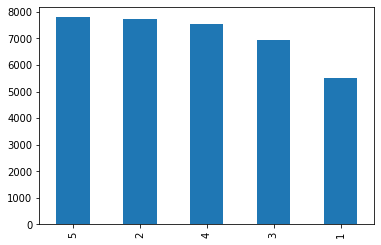

In [30]:
df_clean['Type'].value_counts().plot(kind="bar")

Dapat dilihat bahwa setelah data dibersihkan, ternyata tweet pengguna twitter kebanyakan merupakan cyberbullying dari berbagai kategori, dari hampir 40000 data tweet, sekitar 34000 merupakan cyberbullying dan 6000 bukan cyberbullying, karena data imbalance, nantinya akan dilakukan handling data imbalance dengan downsampling untuk tujuan menjaga performa model agar tetap baik nantinya

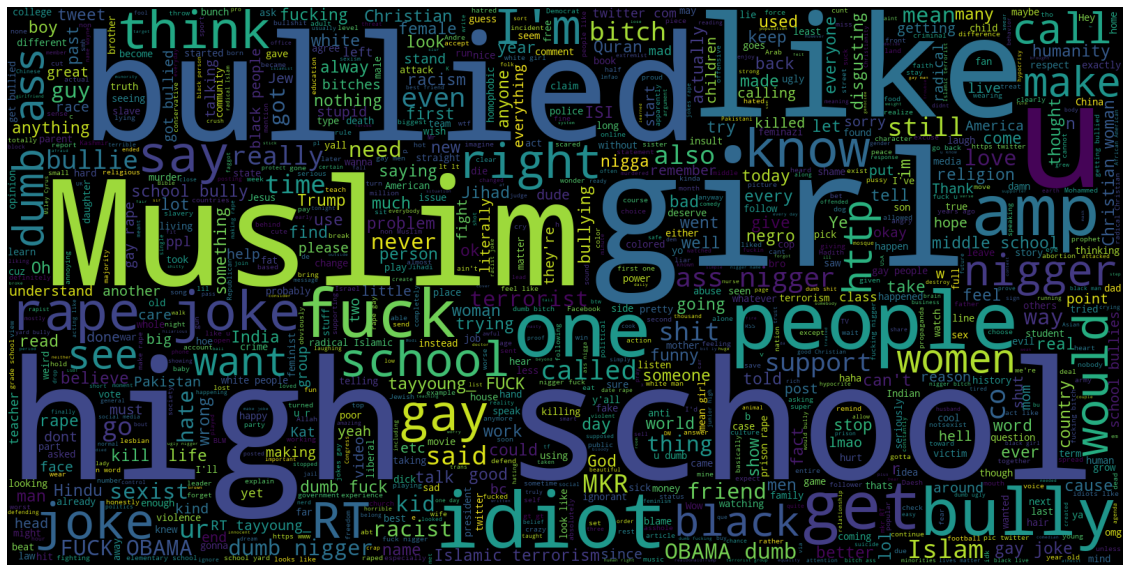

In [31]:
plt.figure(figsize=(20,20))
STOPWORDS = set(stopwords.words('english'))
wordcloud = WordCloud(min_font_size=5, max_words=1000, width=1600 , height=800 , stopwords=STOPWORDS).generate(str(" ".join(df_clean.Tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Wordcloud adalah kumpulan kata pada dokumen yang divisualisaikan berdasarkan ukuran besar kata pada visualisasinya, semakin besar ukuran kata tersebut, menunjukkan bahwa kata tersebut sering muncul dalam sebuah tweet atau merupakan kata yang penting.

Jika kita lihat, kumpulan kata-kata yang penting dapat diasumsikan memiliki indikasi yang mengarah kepada cyberbullyinh seperti bully,gay,idiot,dumb ass
dll. Dapat dikatakan bahwa kata-kate tersebut berpengaruh terhadap jenis kategori tweet apa yang user tulis pada twitter. Banyak kata yang mengindikasi cyberbullying sesuai dengan data dimana pada kasus kali ini tweet user twitter merupakan kasus cyberbullying dari berbagai kategori.

In [32]:
import plotly.express as px

In [33]:
for cyber_type in df_clean.Type.unique():
    
    top50_word = df_clean.Tweet[df_clean.Type==cyber_type].str.split(expand=True).stack().value_counts()[:50]
    
    fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    
    fig.update_layout(title=f"Top 50 words for {cyber_type}",
                     template='simple_white',
                     hovermode='x unified')
    fig.show()

Jika dilihat dari kata-kata yang sering muncul berdasarkan kategorinya, dapat dilihat bahwa jika kategori tweet bukan merupakan cyberbullying, biasanya tidak terdapat kata-kata kasar atau indikasi yang mengarah kepada cyberbullying.

Dan jika kita lihat dari berbagai jenis kategori cyberbullying, terdapat beberapa kata-kata yang mengindikasi sesuai kategori cyberbullying nya.

Seperti pada kategori cyberbullying gender, kata-kata seperti gay dan rape sering muncul pada sebuah tweet.



## Tokenization & Word Embedding


















Splitting Corpus

In [34]:

X_train_full, X_test,  y_train_full, y_test = train_test_split(df_clean.Tweet_processed, 
                                                    df_clean.Type, 
                                                    test_size=0.25, 
                                                    random_state=46, 
                                                    stratify=df_clean.Type
                                                               )

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (21336,)
Test Size  :  (8891,)


Get Vocabularies


In [35]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)

X_train_vec

<21336x26885 sparse matrix of type '<class 'numpy.int64'>'
	with 302857 stored elements in Compressed Sparse Row format>

 Mencari Jumlah Vocab dan Panjang Token dalam Satu Document


In [36]:
jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab:",jml_vocab)
print("Panjang maksimum kalimat:",max_sen_len,"kata")

Jumlah vocab: 26885
Panjang maksimum kalimat: 102 kata


In [37]:
# Text Vectorization
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=25,
                                       input_shape=(1,) # jika ingin menggunakan sequential API
                                       )

text_vectorization.adapt(X_train)

In [38]:
# Embedding
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=20
                      )

## Handling Data Imbalance

In [39]:
X_train

21022                 left wing scum caving violence islam
43780             fck u corny bitch fuck dumb nigger obama
38706    generic anime high school bully meets rooftop ...
32642                       annoying ass kids bi h control
42221    spanish girl could tell fuck dumb nigger ill s...
                               ...                        
17833    memes really r white washing islamic terrorism...
11522    f bad shoulda kept richards ca er bob laughed ...
45861    cj got ta thinking fuck dumb niggers talking b...
7981     people said rape jokes gay characters made jok...
36748    plus get smell like girls bullied high school ...
Name: Tweet_processed, Length: 21336, dtype: object

In [40]:
y_train

21022    5
43780    4
38706    2
32642    2
42221    4
        ..
17833    5
11522    3
45861    4
7981     3
36748    2
Name: Type, Length: 21336, dtype: int64

Menggabungkan kembali train set untuk dilakukan balancing data

In [41]:
df_balance = pd.concat([X_train, y_train], axis=1)



In [42]:
df_balance

,Tweet_processed,Type
21022,left wing scum caving violence islam,5
43780,fck u corny bitch fuck dumb nigger obama,4
38706,generic anime high school bully meets rooftop ...,2
32642,annoying ass kids bi h control,2
42221,spanish girl could tell fuck dumb nigger ill s...,4
...,...,...
17833,memes really r white washing islamic terrorism...,5
11522,f bad shoulda kept richards ca er bob laughed ...,3
45861,cj got ta thinking fuck dumb niggers talking b...,4
7981,people said rape jokes gay characters made jok...,3


Melihat total value Type apa yang paling kecil untuk dijadikan acuan value ketika melakukan downsampling

In [43]:
df_balance['Type'].value_counts()

2    4663
5    4658
4    4516
3    4167
1    3332
Name: Type, dtype: int64

Membuat dataframe baru sesuai tipenya

In [44]:
df_type1 = df_balance.query('Type == 1')
df_type2 = df_balance.query('Type == 2')
df_type3 = df_balance.query('Type == 3')
df_type4 = df_balance.query('Type == 4')
df_type5 = df_balance.query('Type == 5')

Melakukan sampling sebanyak jumlah Type yang paling sedikit yaitu 'not_cyberbullying' dan menginisiasi random state agar data tersebut tetap sama pada setiap Type nya

In [45]:
df2 = df_type2.sample(3332,random_state=17)
df3 = df_type3.sample(3332,random_state=17)
df4 = df_type4.sample(3332,random_state=17)
df5 = df_type5.sample(3332,random_state=17)

Setelah dilakukan balancing, membuat dataframe baru dengan menggabungkan dataframe hasil balancing setiap Type

In [46]:
df_balanced = pd.concat([df_type1, df2,df3,df4,df5], axis=0)

In [47]:
df_balanced

,Tweet_processed,Type
2992,slavery program done turn nations muslims anyt...,1
7425,yeah know fucking hate cat mist pa feels disjo...,1
6615,birkenau concentration camp nazi germany te lo...,1
3836,lls im aint rockin thats wat im talkin bout bully,1
4626,is like teams need gun,1
...,...,...
23021,idiot never muslim ban signed act banning act ...,5
16131,corona jihad pak reason sending corona patient...,5
18994,years ago islam stole women is rights turned ...,5
22723,last mohamed el bachiri lost wife terrorist at...,5


In [48]:
df_balanced['Type'].value_counts()

1    3332
2    3332
3    3332
4    3332
5    3332
Name: Type, dtype: int64

Membuat X dan Y train yang baru menggunakan dataframe yang sudah di balancing

In [49]:
X_train = df_balanced.drop('Type', axis=1)
y_train = df_balanced['Type']

## Convert Target to One Hot Encoder

karena target merupakan multiclass, maka harus dilakukan One Hot Encoding agar model dapat membaca target

In [50]:
y_train_ohe = pd.get_dummies(y_train).values
y_val_ohe = pd.get_dummies(y_val).values

In [51]:
y_train_ohe

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [52]:
y_val_ohe

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

## Modeling

### Deep Learning - Fully Connected Layer

Membuat Arsitektur Model dengan LSTM

In [53]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(LSTM(32, return_sequences=True,kernel_initializer='HeNormal'))
model.add(LSTM(16))
model.add(Dense(5,activation='softmax'))
optm = tf.keras.optimizers.Adamax()
model.compile(optm,loss='categorical_crossentropy',metrics='accuracy')

### Callback

Menambahkan Earlystopping berdasarkan val_loss dengan patience 2 dimana jika saat training epoch melakukan penurunan nilai val_loss 2x berturut-turut, maka training akan diberhentikan untuk mencegah overfit, sedangkan Modelcheckpoint dilakukan dengan tujuan untuk menyimpan model yang terbaik berdasarkan nilai val_loss nya

In [54]:

es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=2)
# rl = ReduceLROnPlateau(monitor='loss',mode='min',verbose=1,patience=2,factor=0.1,min_lr=0.001)
mc = ModelCheckpoint('checkpoint/',monitor='val_loss',verbose=1,mode='min',save_best_only=True)


### Model Summary

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 25)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 25, 128)           3441280   
                                                                 
 lstm (LSTM)                 (None, 25, 32)            20608     
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 5)                 85        
                                                                 
Total params: 3,465,109
Trainable params: 3,465,109
Non-trainable params: 0
______________________________________________

### Model Training

In [56]:
history_seq=model.fit(X_train, y_train_ohe, epochs = 50,callbacks=[es,mc], validation_data=(X_val, y_val_ohe))

Epoch 1/50
520/521 [============================>.] - ETA: 0s - loss: 0.8439 - accuracy: 0.7037
Epoch 1: val_loss improved from inf to 0.37826, saving model to checkpoint/


521/521 [==============================] - 38s 64ms/step - loss: 0.8433 - accuracy: 0.7039 - val_loss: 0.3783 - val_accuracy: 0.8950
Epoch 2/50
519/521 [============================>.] - ETA: 0s - loss: 0.3216 - accuracy: 0.9076
Epoch 2: val_loss improved from 0.37826 to 0.28033, saving model to checkpoint/


521/521 [==============================] - 25s 47ms/step - loss: 0.3219 - accuracy: 0.9074 - val_loss: 0.2803 - val_accuracy: 0.9123
Epoch 3/50
520/521 [============================>.] - ETA: 0s - loss: 0.2424 - accuracy: 0.9282
Epoch 3: val_loss improved from 0.28033 to 0.25475, saving model to checkpoint/


521/521 [==============================] - 26s 50ms/step - loss: 0.2424 - accuracy: 0.9282 - val_loss: 0.2548 - val_accuracy: 0.9177
Epoch 4/50
521/521 [==============================] - ETA: 0s - loss: 0.2019 - accuracy: 0.9414
Epoch 4: val_loss improved from 0.25475 to 0.25047, saving model to checkpoint/


521/521 [==============================] - 39s 74ms/step - loss: 0.2019 - accuracy: 0.9414 - val_loss: 0.2505 - val_accuracy: 0.9207
Epoch 5/50
520/521 [============================>.] - ETA: 0s - loss: 0.1703 - accuracy: 0.9517
Epoch 5: val_loss did not improve from 0.25047
521/521 [==============================] - 14s 27ms/step - loss: 0.1703 - accuracy: 0.9517 - val_loss: 0.2608 - val_accuracy: 0.9173
Epoch 6/50
521/521 [==============================] - ETA: 0s - loss: 0.1475 - accuracy: 0.9585
Epoch 6: val_loss did not improve from 0.25047
521/521 [==============================] - 14s 28ms/step - loss: 0.1475 - accuracy: 0.9585 - val_loss: 0.2627 - val_accuracy: 0.9216
Epoch 6: early stopping


Training berhenti di epoch ke-7 karena nilai val_loss tidak mengalami peningkatan dari epoch ke-6

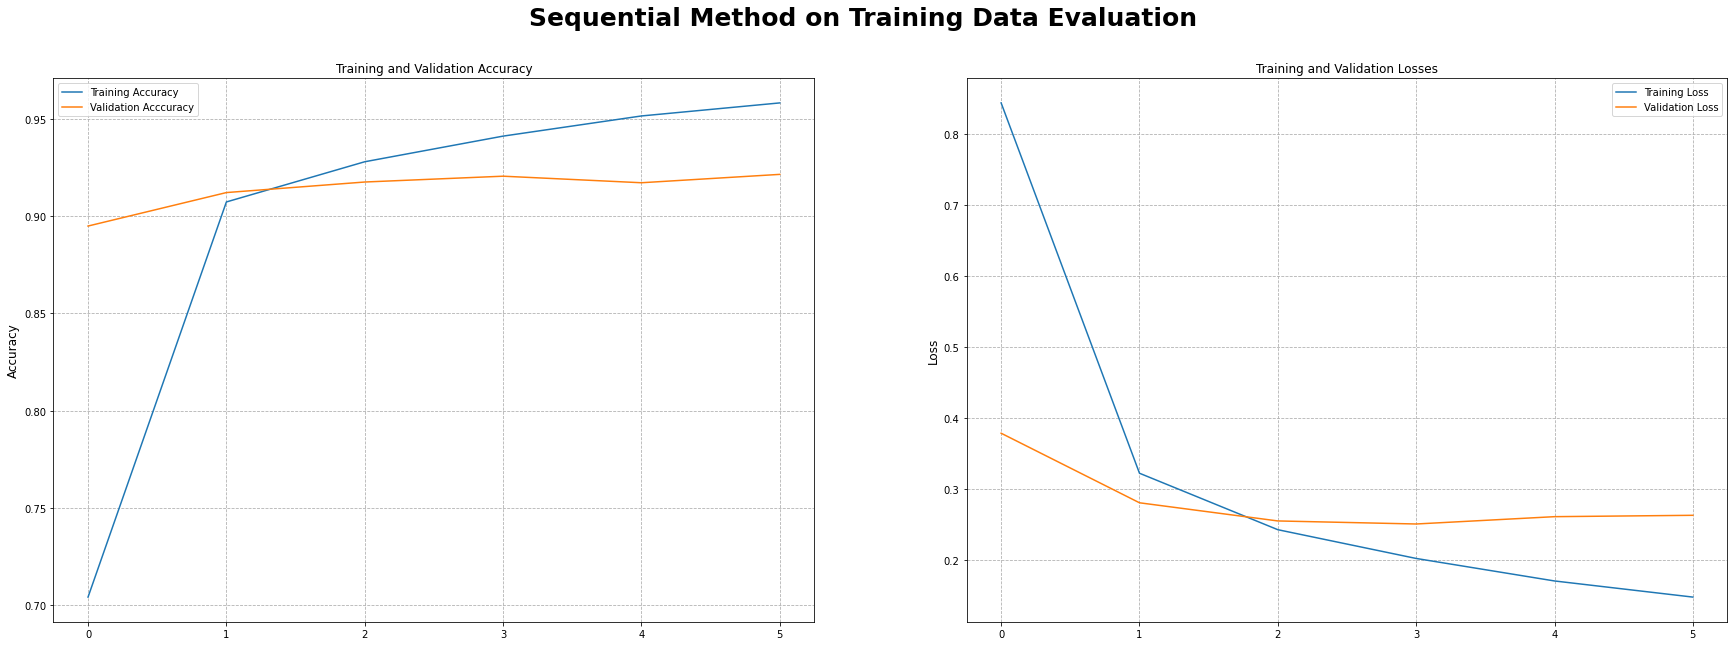

In [57]:

fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seq.history['accuracy'],label="Training Accuracy")
plt.plot(history_seq.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq.history['loss'], label="Training Loss")
plt.plot(history_seq.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Jika kita lihat bahwa model masih sedikit overfit, namun selisih antara accuracy pada train set dan validation set tidak terlalu jauh karena masih berada direntang 0.9 sehingga dapat dikatakan bahwa hasil model bagus karena accuracy nya tinggi.

Jika dilihat dari nilai loss dan val_loss, model juga memiliki nilai loss yang kecil baik itu dari train set atau validation set. Selisih loss nya juga tidak terlalu jauh, yang menandakan jika model melakukan prediksi antara train dan test nya juga tidak terlalu jauh perbedannya.

Walaupun hasil model yang didapat sudah bagus, tetap akan dilakukan model improvement untuk mengurangi overfit nya.

## Model Improvement

In [58]:
model2 = Sequential()
model2.add(text_vectorization)
model2.add(embedding)
model2.add(LSTM(32, return_sequences=True, kernel_initializer='HeNormal', kernel_regularizer='l2'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(LSTM(16))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(5,activation='softmax'))
#optm = tf.keras.optimizers.Adam(learning_rate=0.0001,clipvalue=0.01)
optm = tf.keras.optimizers.Adamax(learning_rate=0.0001,clipvalue = 0.5)
#optm = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.0001)
model2.compile(optm,loss='categorical_crossentropy',metrics='accuracy')


Penambahan yang ada pada Model Improvement:
- Weight Regularization,Batch Normalization,Clip Value: Untuk mencegah terjadinya Exploding Gradient dimana nilai accuracy dan loss mengalami kenaikan atau penurunan nilai yang tidak stabil, Exploding Gradient bisa membuat model jadi jelek ataupun overfit
- Learning Rate: Ditambahkan agar model belajar dari epoch sebelumnya agar dapat menemukan titik terbaik ditinjau dari accuracynya

In [59]:
history_seq_imp=model2.fit(X_train, y_train_ohe, epochs = 50,batch_size = 128,callbacks=[es,mc], validation_data=(X_val, y_val_ohe))

Epoch 1/50
131/131 [==============================] - ETA: 0s - loss: 3.6573 - accuracy: 0.5241
Epoch 1: val_loss did not improve from 0.25047
131/131 [==============================] - 12s 61ms/step - loss: 3.6573 - accuracy: 0.5241 - val_loss: 3.8381 - val_accuracy: 0.4744
Epoch 2/50
130/131 [============================>.] - ETA: 0s - loss: 3.0505 - accuracy: 0.7169
Epoch 2: val_loss did not improve from 0.25047
131/131 [==============================] - 7s 53ms/step - loss: 3.0503 - accuracy: 0.7169 - val_loss: 3.4545 - val_accuracy: 0.6587
Epoch 3/50
130/131 [============================>.] - ETA: 0s - loss: 2.6242 - accuracy: 0.8160
Epoch 3: val_loss did not improve from 0.25047
131/131 [==============================] - 9s 67ms/step - loss: 2.6239 - accuracy: 0.8160 - val_loss: 2.9081 - val_accuracy: 0.7560
Epoch 4/50
130/131 [============================>.] - ETA: 0s - loss: 2.2973 - accuracy: 0.8604
Epoch 4: val_loss did not improve from 0.25047
131/131 [======================

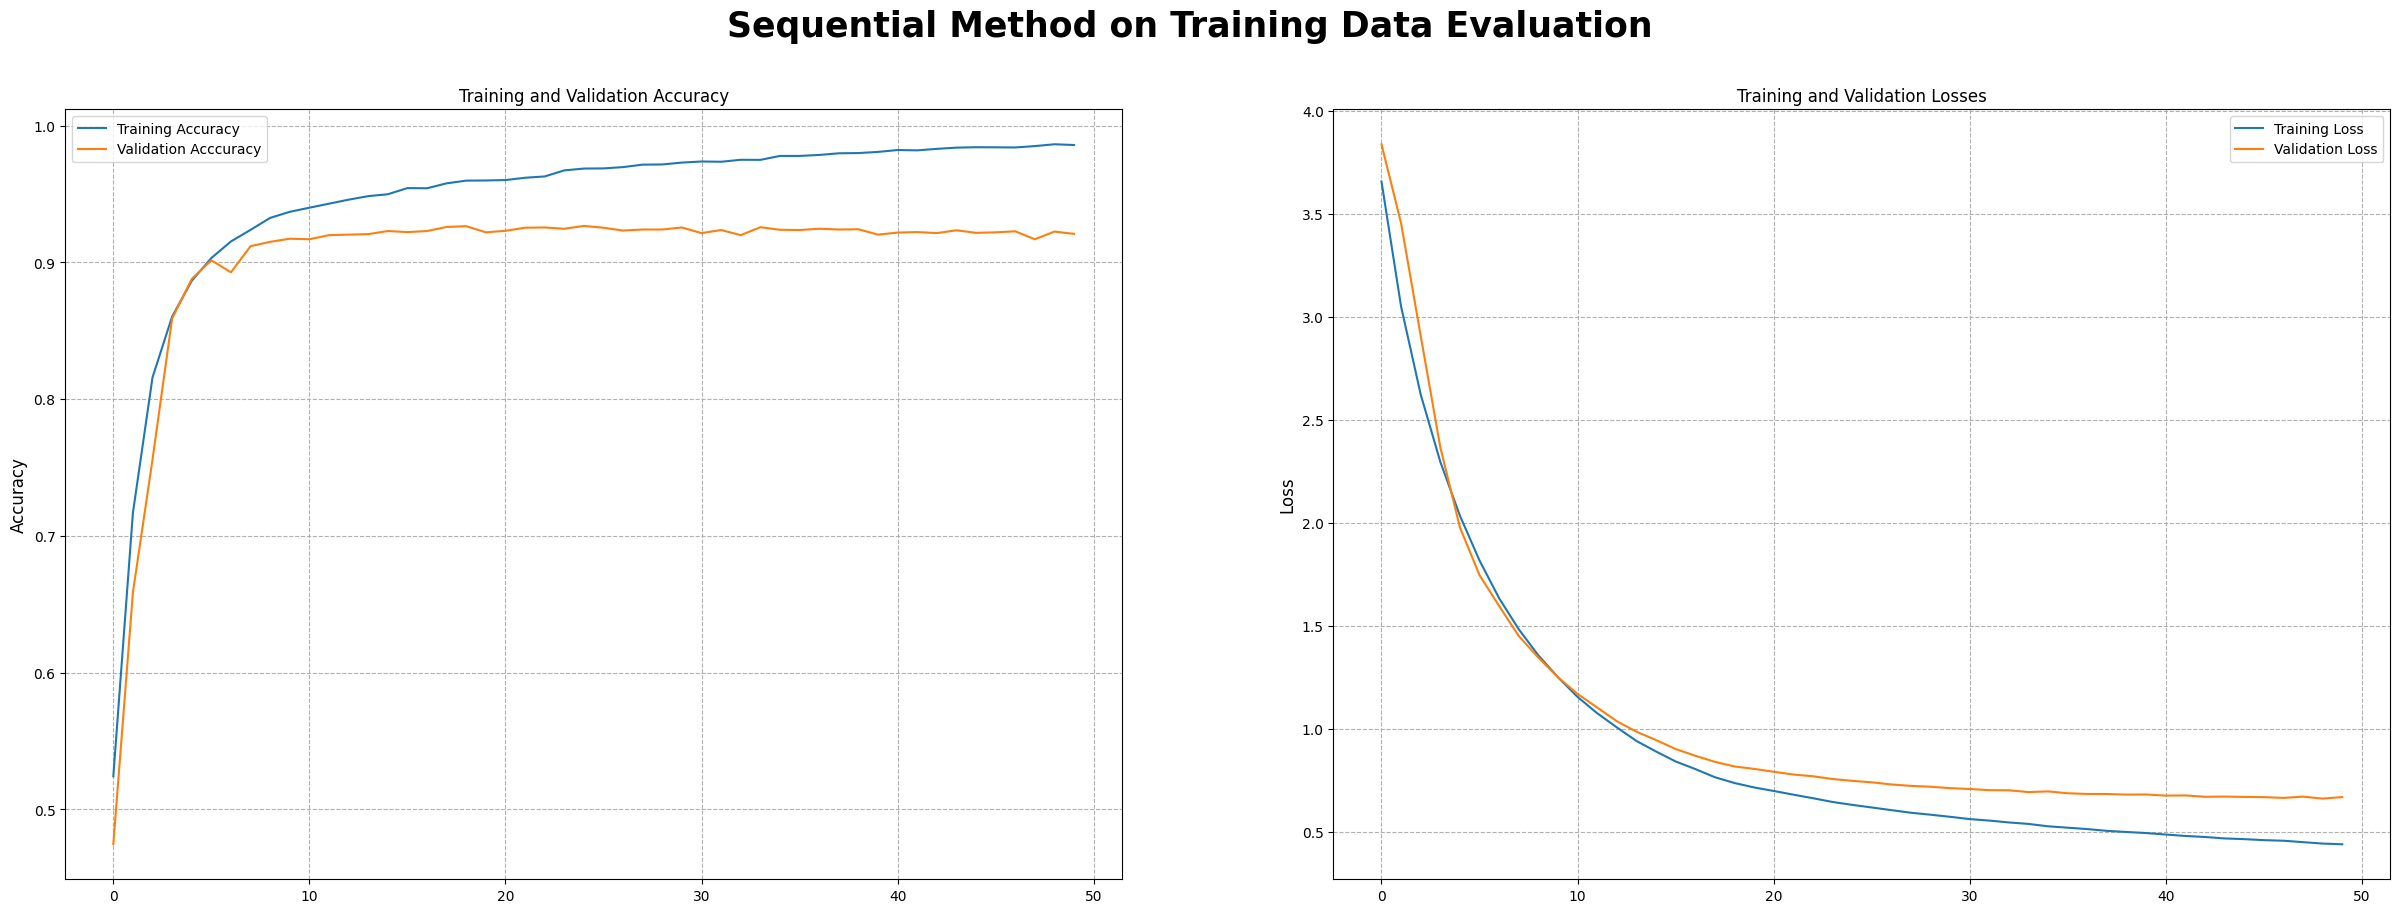

In [60]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seq_imp.history['accuracy'],label="Training Accuracy")
plt.plot(history_seq_imp.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq_imp.history['loss'], label="Training Loss")
plt.plot(history_seq_imp.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Setelah dilakukan Improvement, berdasarkan bentuk grafik membuktikan bahwa mealkukan improvement berhasil mengurangi overfit dari nilai loss nya. Selain itu juga selisih dari accuracy train dan validation juga mengecil. 

Namun jika kita lihat dari hasil model, antara model baseline dan improvement tidak mengalami perubahan yang signifikan antara selisih accuracy. Jika ditinjau dari hasil loss, walaupun hasil loss pada model improvement mempunyai selisih yang kecil daripada baseline, nilai lossnya jauh lebih besar daripada baseline, diman model baseline nilai loss dari train dan validation set berada dibawah 0.5 sedangkan model Improvement diatas 0.5

Berdasarkan hasil analisa, maka ditentukan bahwa model terbaik adalah model baseline dengan nilai accuracy yang tinggi dan selisih yang tidak terlalu jauh antara train dan validationnya, juga memiliki nilai loss yang kecil dan selisih antara train dan loss nya juga tidak jauh.

## Model Evaluation (For Best Model)

In [61]:
y_pred = model.predict(X_test)
y_pred.shape

278/278 [==============================] - 3s 8ms/step


(8891, 5)

In [62]:
ytrue = y_test.astype(int).tolist()
y_pred =np.argmax(y_pred,axis=1)+1

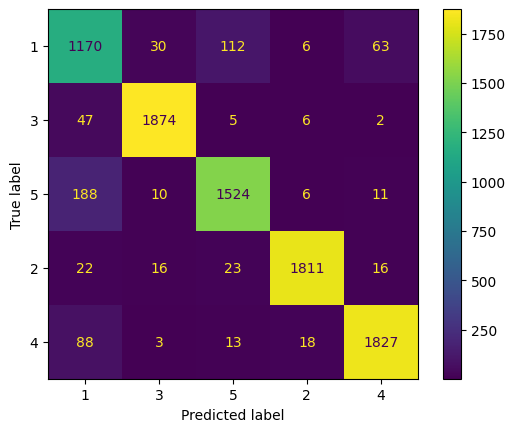

In [72]:
c = confusion_matrix(ytrue, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=df_clean["Type"].unique())
disp.plot()

In [73]:
print(classification_report(ytrue, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.85      0.81      1381
           2       0.97      0.97      0.97      1934
           3       0.91      0.88      0.89      1739
           4       0.98      0.96      0.97      1888
           5       0.95      0.94      0.94      1949

    accuracy                           0.92      8891
   macro avg       0.92      0.92      0.92      8891
weighted avg       0.93      0.92      0.92      8891



Jika kita lihat dari hasil Confusion Matrix, model dapat membaca setiap kategori cyberbullying ataupun bukan cyberbullying dengan baik dimana rata-rata model berhasil mengklasifikasi diatas 1000 data. Model paling banyak salah membaca class pada class not_cyberbullying dimana model cukup banyak salah mengklasifikan tweet not_cyberbullying menjadi tweet yang merupakan cyberbullying namun masih tetap diatas 1000 data yang benar diklasifikan yaitu sebesar 1170 walaupun cukup berbeda jauh dari jumlah klasifikai yang benar pada kelas lain yang berada pada rentang 1500 keatas. Bisa disimpulkan secara kesuluruhan jika dilihat dari Confusion Matrix, model bisa mengklasifikasikan jenis tweet dengan cukup baik dan memiliki kesalahan yang tidak banyak.

Pada hasil Classification Report, saya memfokuskan melihat kepada nilai f1. dimana f1 dapat dianalogikan sebagai akurasi yang artinya ketepatan dalam memprediksi namun berdasarkan kelas-kelas targetnya. Rata-rata dari f1 score model adalah 0,916 yang artinya model cukup baik dalam memprediksi. Dikarenakan Data pada kasus kali ini merupakan data balanced, maka kita dapat juga meninjau dari accuracy, nilai accuracy yang didapat memiliki nilai yang tinggi dan mirip dengan nilai rata-rata f1 score. Dapat disimpulkan secara keseluruhan model sangat baik dalam mengklasifikasian tweet. Rentang nilai dari f1 score adalah 0,81 sampai 0,97, dapat diartikan bahwa selain memiliki akurasi yang tinggi, model juga cukup tepat dalam memprediksi setiap target yang ada karena nilai f1 score yang paling rendah yaitu 0.81 masih merupakan nilai yang cukup besar





## Model Saving

In [65]:
import pickle

with open("pipeline.pkl", "wb") as f:
    pickle.dump(teks_proses, f)

In [66]:
model.save('modelnlp',save_format='tf')

## Model inference

Membuat kalimat untuk diklasifikasikan jenis tweet nya.

In [67]:
sentence = "i want to rape someone tonight"

melakukan preprocessing pada kalimat yang telah dibuat dengan fungsi preprocess yang sudah dibuat sebelumnya

In [68]:
teks_proses(sentence)

'want rape someone tonight'

Untuk melakukan prediksi, saya harus membuat array 2 dimensi agar model bisa membaca dan memprediksi

In [69]:
inference_pred = model.predict(np.array([[sentence]]))

1/1 [==============================] - 0s 22ms/step


In [70]:
inference_pred

array([[0.03015617, 0.00251273, 0.95762146, 0.00450995, 0.00519977]],
      dtype=float32)

menampilkan hasil prediksi dengan mengambil nilai yang paling tinggi pada array diatas

In [71]:
np.argmax(inference_pred,axis=1)+1

array([3])

Hasil Prediksi menunjukkan bahwa tweet diatas merupakan kategori gender Cyberbullying

Cyberbullying Type:
- not cyberbullying : 1 
- age cyberbullying: 2
- gender cyberbullying: 3 
- ethnicity cyberbullying: 4 
- religion cyberbullying: 5

## Conclusion

Model yang sudah dibuat Jika ditinjau dari f1 score dan accuracy, dapat mengklasifikasikan setiap target dengan baik dan secara keseluruhan memiliki ketepatan prediksi yang tinggi

Dari Pembuatan model baseline, model sudah memiliki nilai accuracy yang tinggi dan nilai loss yang kecil dari train dan validation set nya, namu. masih sedikit overfit jika dilihat dari grafik walaupun selisih accuracy dan loss antara train dan validation set sebenernya tidak jauh.

Setelah dilakukan tuning, model dapat mengurangi overfit namun nilai loss mengalami kenaikan yang cukup tinggi. 

Sehingga berdasarkan pertimbangan tersebut diambil model yang terbaik yaitu model baseline karena nilai lossnya jauh lebih kecil dan selisih antara accuracy dan loss pada train dan validation set juga tidak berbeda jauh daripada improved model.

Untuk model menggunakan LSTM, alasan penggunaan LSTM adalah karena LSTM mempertimbangkan runtutan dalam kalimat

Penyebab model berjalan dengan baik bisa disebabkan oleh data preprcoessing yang baik sehingga teks yang diproses sudah sangat bersih. Selain itu, balancing data juga mempengaruhi performa model menjadi lebih baik lagi.

Kesimpulannya model dapat digunakan untuk mengklasifikan tweet sebagai Cyberbullying atau tidak.

Kedepannya agar model lebih baik lagi, bisa mencari dataset dengan jumlah vocab yang lebih banyak lagi sehingga model dapat mempelajari kata-kata yang lebih lengkap lagi, karena ada kemungkinan kata yang tidak diketahui oleh model ternyata merupakan kata yang berindikasi atau mengarah ke jenis-jenis cyberbullying

